In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
from datetime import datetime

In [2]:
#some clustering libraries
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)
# df=pd.read_csv('OnlineRetail.csv')
# df.head(2)

In [4]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Comment -

Always observe and separate the identity features (because they are never used for training), numeric,categorical and target features. You don't have a target. So just the numberic and categorical. Study them individually then. Use describe for the numerics.

In [ ]:
df.shape #number of rows and columns

(541909, 8)

In [ ]:
df.info() # count, and data types of each feauture

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Comments -

What's you observation here?

In [6]:
df.InvoiceNo.unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [7]:
df.StockCode.unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [8]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [9]:
df.Country.unique()  #which countries there are

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Comments -

It's good you are checking unique values but also check how many are they. This will give you an overview of the cardinality of these variables. 

I would us - 
`for col in df.columns: print(len(df[col].unique())`

In [ ]:
def display_missing(df):  #find out missing values per each column
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum())) #provide blank space, and fill with the value of sum of empty cells
      #  print('\n') # go to next line
display_missing(df)

InvoiceNo column missing values: 0
StockCode column missing values: 0
Description column missing values: 1454
Quantity column missing values: 0
InvoiceDate column missing values: 0
UnitPrice column missing values: 0
CustomerID column missing values: 135080
Country column missing values: 0


Comment - 

Use .isna.sum(). It is less code. No function, no for loop required.

In [ ]:
df_corr=df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'CustomerID']   #VERY LOW CORRELATION  

,Feature 1,Feature 2,Correlation Coefficient
0,CustomerID,CustomerID,1.00000
3,CustomerID,UnitPrice,0.00456
5,CustomerID,Quantity,0.00360


In [ ]:
df_corr=df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'UnitPrice']   #VERY LOW CORRELATION 

,Feature 1,Feature 2,Correlation Coefficient
1,UnitPrice,UnitPrice,1.000000
4,UnitPrice,CustomerID,0.004560
7,UnitPrice,Quantity,0.001235


Comment -

Why check one bt one? Use heatmap or sns.paiplot to get an idea. Note your observations in bullet points in markdowns.

In [ ]:
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df.mindate = df['InvoiceDate'].min()
df['mindate'] = np.nan
df['mindate'] = pd.to_datetime(df['mindate'], format='%d-%m-%Y %H:%M')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   mindate      0 non-null       datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mindate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaT
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaT
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaT
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaT
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaT


In [ ]:
df['month']=pd.DatetimeIndex(df['InvoiceDate']).month
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['dow'] = pd.DatetimeIndex(df['InvoiceDate']).dayofweek
df.tail(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   mindate      0 non-null       datetime64[ns]
 9   month        541909 non-null  int64         
 10  year         541909 non-null  int64         
 11  dow          541909 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 49.6+ MB


Comment -

Good job there!

In [ ]:
np.unique(df.dow.values)  #one day of week value is missing from the original data, nothing to do, ignore and continue

array([0, 1, 2, 3, 4, 6], dtype=int64)

Comment-
Do you know which day it is? Check the documentation for datetime on what 0 to 6 means.

In [ ]:
df["mindate"] = pd.Timestamp("01-12-2010 8:26")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   mindate      541909 non-null  datetime64[ns]
 9   month        541909 non-null  int64         
 10  year         541909 non-null  int64         
 11  dow          541909 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 49.6+ MB


In [ ]:
maxdate = max(df['InvoiceDate'])
df['dp'] = maxdate - df['InvoiceDate']
df['days'] =df['InvoiceDate'] - df['mindate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mindate,month,year,dow,dp,days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373 days 04:24:00,323 days
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373 days 04:24:00,323 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373 days 04:24:00,323 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373 days 04:24:00,323 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373 days 04:24:00,323 days


Comment -

Why did you do this? Not sure I understand your objective. Use more user friendly column names and use markdown to describe your thought process.

In [ ]:
df['dp'] = pd.to_numeric(df['dp'].dt.days, downcast='integer')
df['days'] = pd.to_numeric(df['days'].dt.days, downcast='integer')
df['revenue']= df ['Quantity']* df['UnitPrice']
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mindate,month,year,dow,dp,days,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34


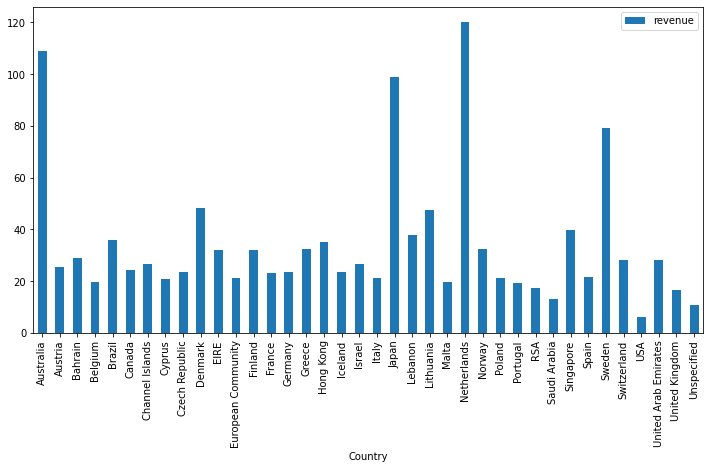

In [ ]:
import matplotlib.pyplot as plt
c_pivot=df.pivot_table(index='Country', values='revenue')
c_pivot.plot.bar(figsize=(12,6))
plt.show()

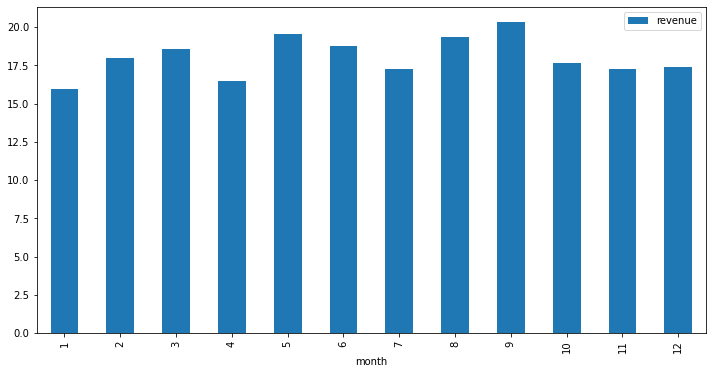

In [ ]:
import matplotlib.pyplot as plt
c_pivot=df.pivot_table(index='month', values='revenue')
c_pivot.plot.bar(figsize=(12,6))
plt.show()

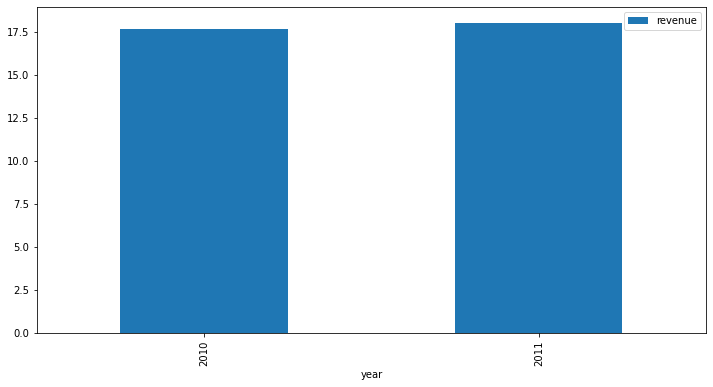

In [ ]:
import matplotlib.pyplot as plt
c_pivot=df.pivot_table(index='year', values='revenue')
c_pivot.plot.bar(figsize=(12,6))
plt.show()

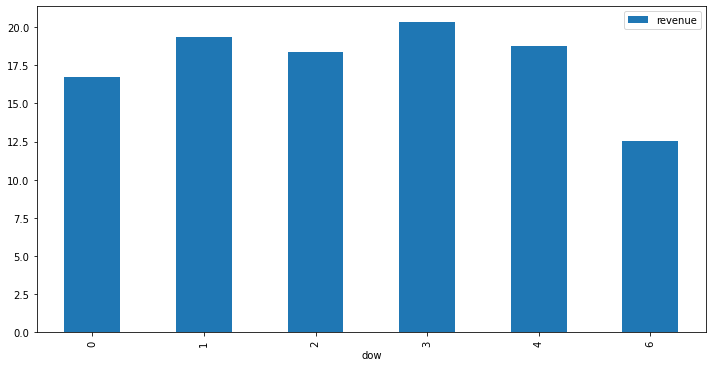

In [ ]:
import matplotlib.pyplot as plt
c_pivot=df.pivot_table(index='dow', values='revenue')
c_pivot.plot.bar(figsize=(12,6))
plt.show()

In [ ]:
df.info()  #final datatypes after conversions and adding new columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   mindate      541909 non-null  datetime64[ns]
 9   month        541909 non-null  int64         
 10  year         541909 non-null  int64         
 11  dow          541909 non-null  int64         
 12  dp           541909 non-null  int16         
 13  days         541909 non-null  int16         
 14  revenue      541909 non-null  float64       
dtypes: datetime64[ns](2), float64(3), 

Quantity         AxesSubplot(0.125,0.125;0.0731132x0.755)
UnitPrice     AxesSubplot(0.212736,0.125;0.0731132x0.755)
CustomerID    AxesSubplot(0.300472,0.125;0.0731132x0.755)
days          AxesSubplot(0.388208,0.125;0.0731132x0.755)
revenue       AxesSubplot(0.475943,0.125;0.0731132x0.755)
month         AxesSubplot(0.563679,0.125;0.0731132x0.755)
dow           AxesSubplot(0.651415,0.125;0.0731132x0.755)
dtype: object

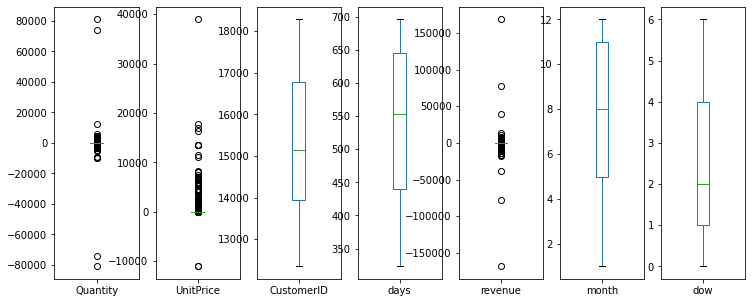

In [ ]:
boxplot_cols=['Quantity', 'UnitPrice', 'CustomerID','days', 'revenue', 'month', 'dow', 'Country', 'InvoiceNo']
df[boxplot_cols].plot(kind='box', subplots=True, layout=(1,9), figsize=(16,5))

In [ ]:
corr=df[['Quantity', 'UnitPrice', 'days', 'revenue','CustomerID' , 'month', 'dow', 'Country']].corr()  #only correlation between Quantity and revenue--makes sense
corr

,Quantity,UnitPrice,days,revenue,CustomerID,month,dow
Quantity,1.000000,-0.001235,0.000658,0.886681,-0.003600,-0.001116,-0.000904
UnitPrice,-0.001235,1.000000,-0.004547,-0.162029,-0.004560,-0.000497,-0.007310
days,0.000658,-0.004547,1.000000,0.000338,-0.000699,0.600329,0.029152
revenue,0.886681,-0.162029,0.000338,1.000000,-0.002274,0.000141,-0.002458
CustomerID,-0.003600,-0.004560,-0.000699,-0.002274,1.000000,0.030612,0.020822
month,-0.001116,-0.000497,0.600329,0.000141,0.030612,1.000000,0.040045
dow,-0.000904,-0.007310,0.029152,-0.002458,0.020822,0.040045,1.000000


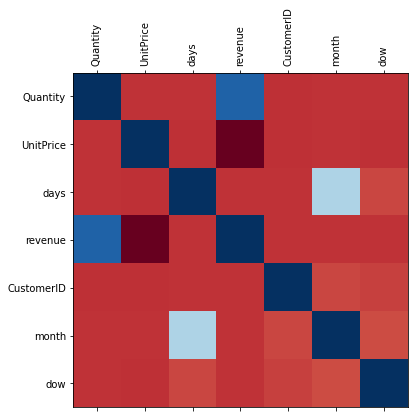

In [ ]:
fig=plt.figure(figsize=(6,6))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);  #only correlation between Quantity and revenue--makes sense

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,month,year,dow,dp,days,revenue
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,7.553128,2010.921609,2.431277,157.403319,537.994966,17.987795
std,218.081158,96.759853,1713.600303,3.509055,0.268787,1.844709,115.883491,115.877117,378.810824
min,-80995.000000,-11062.060000,12346.000000,1.000000,2010.000000,0.000000,0.000000,323.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,5.000000,2011.000000,1.000000,51.000000,440.000000,3.400000
50%,3.000000,2.080000,15152.000000,8.000000,2011.000000,2.000000,142.000000,553.000000,9.750000
75%,10.000000,4.130000,16791.000000,11.000000,2011.000000,4.000000,256.000000,645.000000,17.400000
max,80995.000000,38970.000000,18287.000000,12.000000,2011.000000,6.000000,373.000000,696.000000,168469.600000


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mindate,month,year,dow,dp,days,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34


In [ ]:
df = df[(df.UnitPrice>0) & (df.Quantity>0)]  #remove negative Quantities and prices
df.describe()

,Quantity,UnitPrice,CustomerID,month,year,dow,dp,days,revenue
count,530104.000000,530104.000000,397884.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15294.423453,7.560611,2010.921751,2.436626,157.124410,538.273671,20.121871
std,155.524124,35.915681,1713.141560,3.508496,0.268563,1.850651,115.927848,115.921079,270.356743
min,1.000000,0.001000,12346.000000,1.000000,2010.000000,0.000000,0.000000,323.000000,0.001000
25%,1.000000,1.250000,13969.000000,5.000000,2011.000000,1.000000,51.000000,440.000000,3.750000
50%,3.000000,2.080000,15159.000000,8.000000,2011.000000,2.000000,141.000000,554.000000,9.900000
75%,10.000000,4.130000,16795.000000,11.000000,2011.000000,4.000000,256.000000,645.000000,17.700000
max,80995.000000,13541.330000,18287.000000,12.000000,2011.000000,6.000000,373.000000,696.000000,168469.600000


In [ ]:
def display_missing(df):  #find out missing values per each column  --> CustomerID and description columns have null
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum())) #provide blank space, and fill with the value of sum of empty cells
      #  print('\n') # go to next line
display_missing(df)

InvoiceNo column missing values: 0
StockCode column missing values: 0
Description column missing values: 0
Quantity column missing values: 0
InvoiceDate column missing values: 0
UnitPrice column missing values: 0
CustomerID column missing values: 132220
Country column missing values: 0
mindate column missing values: 0
month column missing values: 0
year column missing values: 0
dow column missing values: 0
dp column missing values: 0
days column missing values: 0
revenue column missing values: 0


In [ ]:
df = df[df.CustomerID.notnull()].copy() #remove rows with empty CusotmerIds, need to identfy the customer
df.describe()

,Quantity,UnitPrice,CustomerID,month,year,dow,dp,days,revenue
count,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,7.612475,2010.934260,2.614546,151.017304,544.428746,22.397000
std,179.331775,22.097877,1713.141560,3.416520,0.247828,1.928310,112.838746,112.819474,309.071041
min,1.000000,0.001000,12346.000000,1.000000,2010.000000,0.000000,0.000000,323.000000,0.001000
25%,2.000000,1.250000,13969.000000,5.000000,2011.000000,1.000000,49.000000,450.000000,4.680000
50%,6.000000,1.950000,15159.000000,8.000000,2011.000000,2.000000,130.000000,565.000000,11.800000
75%,12.000000,3.750000,16795.000000,11.000000,2011.000000,4.000000,246.000000,646.000000,19.800000
max,80995.000000,8142.750000,18287.000000,12.000000,2011.000000,6.000000,373.000000,696.000000,168469.600000


In [ ]:
df = df[df.Description.notnull()].copy()
df.describe()

,Quantity,UnitPrice,CustomerID,month,year,dow,dp,days,revenue
count,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,7.612475,2010.934260,2.614546,151.017304,544.428746,22.397000
std,179.331775,22.097877,1713.141560,3.416520,0.247828,1.928310,112.838746,112.819474,309.071041
min,1.000000,0.001000,12346.000000,1.000000,2010.000000,0.000000,0.000000,323.000000,0.001000
25%,2.000000,1.250000,13969.000000,5.000000,2011.000000,1.000000,49.000000,450.000000,4.680000
50%,6.000000,1.950000,15159.000000,8.000000,2011.000000,2.000000,130.000000,565.000000,11.800000
75%,12.000000,3.750000,16795.000000,11.000000,2011.000000,4.000000,246.000000,646.000000,19.800000
max,80995.000000,8142.750000,18287.000000,12.000000,2011.000000,6.000000,373.000000,696.000000,168469.600000


In [ ]:
# Remove duplicate items 
df = df[~df.duplicated()]
df.describe()

,Quantity,UnitPrice,CustomerID,month,year,dow,dp,days,revenue
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,7.601871,2010.934631,2.606911,151.204379,544.242641,22.631500
std,180.492832,22.241836,1713.539549,3.415015,0.247177,1.923929,112.691582,112.672325,311.099224
min,1.000000,0.001000,12346.000000,1.000000,2010.000000,0.000000,0.000000,323.000000,0.001000
25%,2.000000,1.250000,13955.000000,5.000000,2011.000000,1.000000,49.000000,450.000000,4.950000
50%,6.000000,1.950000,15150.000000,8.000000,2011.000000,2.000000,131.000000,565.000000,12.450000
75%,12.000000,3.750000,16791.000000,11.000000,2011.000000,4.000000,246.000000,646.000000,19.800000
max,80995.000000,8142.750000,18287.000000,12.000000,2011.000000,6.000000,373.000000,696.000000,168469.600000


In [ ]:
df3= df[df['Description'].astype(str).str.contains('WRONG') ==True]
df4= df[df['Description'].astype(str).str.contains('LOST') ==True]
df5= df[df['Description'].astype(str).str.contains('CRUSHED') ==True]
df6= df[df['Description'].astype(str).str.contains('SMASHED') ==True]
df7= df[df['Description'].astype(str).str.contains('DAMAGED') ==True]
df8= df[df['Description'].astype(str).str.contains('FOUND') ==True]
df9= df[df['Description'].astype(str).str.contains('THROWN') ==True]
df10= df[df['Description'].astype(str).str.contains('MISSING') ==True]
df11= df[df['Description'].astype(str).str.contains('AWAY') ==True]
df12= df[df['Description'].astype(str).str.contains('\\?') ==True]
df13= df[df['Description'].astype(str).str.contains('POSTAGE') ==True]
df14= df[df['Description'].astype(str).str.contains('MANUAL') ==True]
df15= df[df['Description'].astype(str).str.contains('CHARGES') ==True]
df16= df[df['Description'].astype(str).str.contains('AMAZON') ==True]
df17= df[df['Description'].astype(str).str.contains(' FEE ') ==True]
df18= df[df['Description'].astype(str).str.contains('FAULT') ==True]
df19= df[df['Description'].astype(str).str.contains('SALES') ==True]
df20= df[df['Description'].astype(str).str.contains('ADJUST') ==True]
df21= df[df['Description'].astype(str).str.contains('COUNTED') ==True]
#df22= df[df['Description'].astype(str).str.contains('LABEL') ==True]
df23= df[df['Description'].astype(str).str.contains('INCORRECT') ==True]
df24= df[df['Description'].astype(str).str.contains(' SOLD ') ==True]
df25= df[df['Description'].astype(str).str.contains('BROKEN') ==True]
df26= df[df['Description'].astype(str).str.contains('BARCODE') ==True]
#df27= df[df['Description'].astype(str).str.contains('CRACKED') ==True]
df28= df[df['Description'].astype(str).str.contains('RETURNED') ==True]
df29= df[df['Description'].astype(str).str.contains('MAILOUT') ==True]
df30= df[df['Description'].astype(str).str.contains('DELIVERY') ==True]
df31= df[df['Description'].astype(str).str.contains('MIX UP') ==True]
df32= df[df['Description'].astype(str).str.contains('PUT ASIDE') ==True]
df33= df[df['Description'].astype(str).str.contains('MOULDY') ==True]
df34= df[df['Description'].astype(str).str.contains('ERROR') ==True]
df35= df[df['Description'].astype(str).str.contains('DESTROYED') ==True]
df36= df[df['Description'].astype(str).str.contains('RUSTY') ==True]

print(df3)
print(df4)
print(df5)
print(df6)
print(df7)
print(df8)
print(df9)
print(df10)
print(df11)

print(df12)
print(df13)
print(df14)
print(df15)
print(df16)
print(df17)
print(df18)
print(df19)
print(df20)

print(df21)
#print(df22)
print(df23)
print(df24)
print(df25)
print(df26)
#print(df27)
print(df28)
print(df29)
print(df30)
print(df31)
print(df32)
print(df33)
print(df34)
print(df35)
print(df36)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, mindate, month, year, dow, dp, days, revenue]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, mindate, month, year, dow, dp, days, revenue]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, mindate, month, year, dow, dp, days, revenue]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, mindate, month, year, dow, dp, days, revenue]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, mindate, month, year, dow, dp, days, revenue]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, mindate, month, year, do

In [ ]:
df2 = df[~df['Description'].astype(str).str.contains('POSTAGE')]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mindate,month,year,dow,dp,days,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34


In [ ]:
df37 = df[df['InvoiceNo'] == '536370']
df37.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mindate,month,year,dow,dp,days,revenue
43,536370,22544,MINI JIGSAW SPACEBOY,24,2010-12-01 08:45:00,0.42,12583.0,France,2010-01-12 08:26:00,12,2010,2,373,323,10.08
44,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,12583.0,France,2010-01-12 08:26:00,12,2010,2,373,323,23.40
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,2010-01-12 08:26:00,12,2010,2,373,323,54.00


In [ ]:
df = df.dropna()
df.shape

(392692, 15)

<AxesSubplot:>

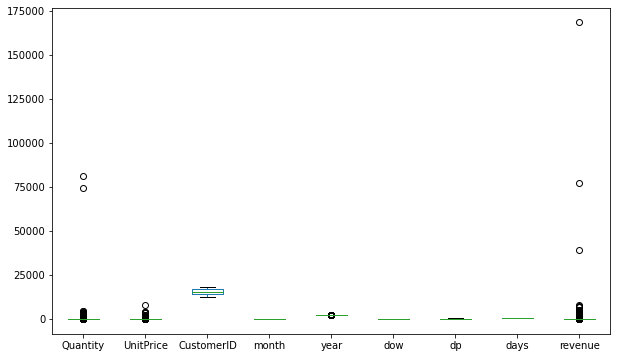

In [ ]:
df.plot.box(figsize=(10,6))   #Show outliers --> no action we do not want to exlude exceptional customers from the analysis

In [ ]:
print(df['Quantity'].quantile(0.50)) 
print(df['Quantity'].quantile(0.9999)) 

6.0
1510.9634999994887


In [ ]:
df39 = df[~(df['Quantity'] > 1200)]  
df39.describe()

,Quantity,UnitPrice,CustomerID,month,year,dow,dp,days,revenue
count,392622.000000,392622.000000,392622.000000,392622.000000,392622.000000,392622.000000,392622.000000,392622.000000,392622.000000
mean,12.394484,3.126288,15287.801514,7.601973,2010.934642,2.606950,151.196966,544.250032,21.688089
std,33.666160,22.243797,1713.534321,3.414895,0.247157,1.923985,112.687843,112.668592,90.994351
min,1.000000,0.001000,12347.000000,1.000000,2010.000000,0.000000,0.000000,323.000000,0.001000
25%,2.000000,1.250000,13955.000000,5.000000,2011.000000,1.000000,49.000000,450.000000,4.950000
50%,6.000000,1.950000,15150.000000,8.000000,2011.000000,2.000000,131.000000,565.000000,12.390000
75%,12.000000,3.750000,16791.000000,11.000000,2011.000000,4.000000,246.000000,646.000000,19.800000
max,1200.000000,8142.750000,18287.000000,12.000000,2011.000000,6.000000,373.000000,696.000000,38970.000000


In [ ]:
df.dow.unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
 8   mindate      392692 non-null  datetime64[ns]
 9   month        392692 non-null  int64         
 10  year         392692 non-null  int64         
 11  dow          392692 non-null  int64         
 12  dp           392692 non-null  int16         
 13  days         392692 non-null  int16         
 14  revenue      392692 non-null  float64       
dtypes: datetime64[ns](2), float64(2), 

In [ ]:
#total revenue of transactions based on customerid
dfr = df.groupby('CustomerID')['revenue'].sum()
dfr = dfr.reset_index()
dfr.head()

,CustomerID,revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
#calculate freq of purchase based on customerid
dff = df.groupby('CustomerID')['InvoiceNo'].count()
dff = dff.reset_index()
dff.columns = ['CustomerID', 'Frequency']
dff.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
#combine freq and revenue datasets
dfrf = pd.merge(dfr, dff, on='CustomerID', how='inner')
dfrf.head()

,CustomerID,revenue,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
#calculate how recent was the last transaction
dfdp = df.groupby('CustomerID')['dp'].min()
dfdp = dfdp.reset_index()
dfdp.head()

,CustomerID,dp
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
#combine dfrf with dfrec
dfc = pd.merge(dfrf, dfdp, on='CustomerID', how='inner')
dfc.columns = ['CustomerID', 'revenue', 'frequency', 'daysprior']
dfc.describe()

,revenue,frequency,daysprior
count,4338.000000,4338.000000,4338.000000
mean,2048.688081,90.523744,91.536422
std,8985.230220,225.506968,100.014169
min,3.750000,1.000000,0.000000
25%,306.482500,17.000000,17.000000
50%,668.570000,41.000000,50.000000
75%,1660.597500,98.000000,141.000000
max,280206.020000,7676.000000,373.000000


array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

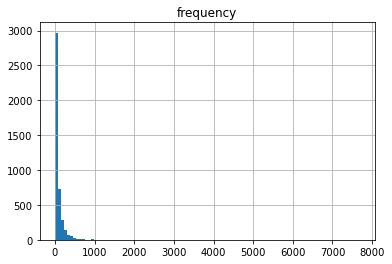

In [ ]:
dfc.hist(column='frequency', bins=100)

array([[<AxesSubplot:title={'center':'revenue'}>]], dtype=object)

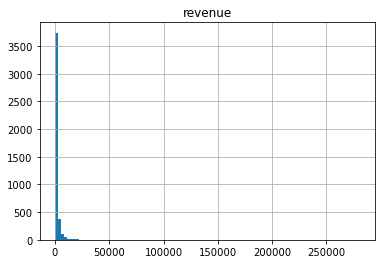

In [ ]:
dfc.hist(column='revenue', bins=100)

array([[<AxesSubplot:title={'center':'daysprior'}>]], dtype=object)

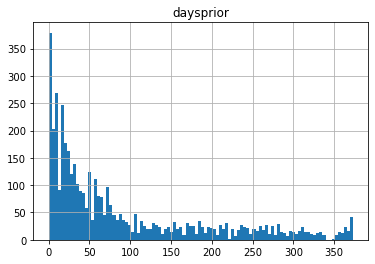

In [ ]:
dfc.hist(column='daysprior', bins=100)

revenue         AxesSubplot(0.125,0.536818;0.227941x0.343182)
frequency    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
daysprior    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
dtype: object

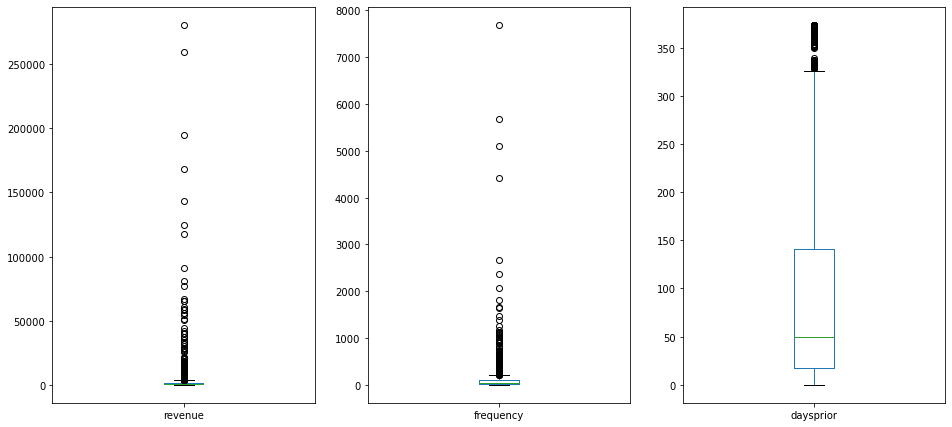

In [ ]:
boxplot_cols=['revenue', 'frequency', 'daysprior']
dfc[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(16,16))

In [ ]:
dfc.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
df.head()                      

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mindate,month,year,dow,dp,days,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,12,2010,2,373,323,20.34


In [ ]:
dfcsecondanalysis=dfc.copy()
dfcsecondanalysis.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


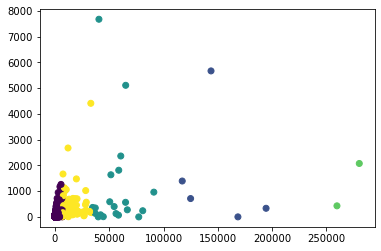

In [ ]:
X = dfcsecondanalysis[['revenue', 'frequency', 'daysprior']].to_numpy()      

y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)  

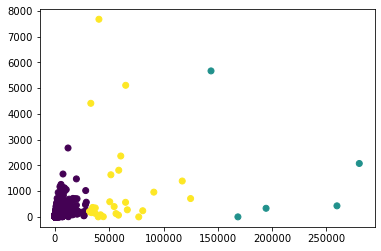

In [ ]:
X = dfc[['revenue', 'frequency', 'daysprior']].to_numpy()      

y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)  

In [ ]:
# Rescaling the attributes

dfc2 = dfc[[ 'revenue', 'frequency', 'daysprior']]

# Instantiate
scaler = StandardScaler()

# fit_transform
dfc3 = scaler.fit_transform(dfc2)
dfc3.shape

(4338, 3)

In [ ]:
dfc3 = pd.DataFrame(dfc3)
dfc3.columns = ['revenue', 'frequency', 'daysprior']
dfc3.head()

,revenue,frequency,daysprior
0,8.363010,-0.397035,2.334574
1,0.251699,0.405694,-0.905340
2,-0.027988,-0.263986,-0.175360
3,-0.032406,-0.077717,-0.735345
4,-0.190812,-0.326075,2.174578


In [ ]:
dfc.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


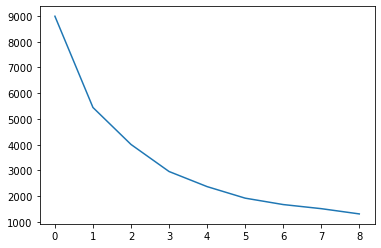

In [ ]:
# Elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dfc3)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [ ]:
# Silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dfc3)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dfc3, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9312310483407636
For n_clusters=3, the silhouette score is 0.6022759587511283
For n_clusters=4, the silhouette score is 0.6014738543563704
For n_clusters=5, the silhouette score is 0.6165550700897563
For n_clusters=6, the silhouette score is 0.591226826316891
For n_clusters=7, the silhouette score is 0.5227273211798416
For n_clusters=8, the silhouette score is 0.5233039673638264


#DO NOT KNOW how to integrate this piece to get the best iteration out of all based on Silhouette scores :(
best_result = (n_clusters, metric_score)
clusters = []
for M iterations:
    for 1 to N clusters:
        Kmeans(n_clusters)
        calculate metric_score
        if metric_score better than previous best:
            save cluster assignments
            update best_result
            


In [ ]:
corr=dfc[['revenue', 'frequency', 'daysprior']].corr()  #medium correlation between revenue and frequency as expected
corr

,revenue,frequency,daysprior
revenue,1.000000,0.425282,-0.121831
frequency,0.425282,1.000000,-0.206444
daysprior,-0.121831,-0.206444,1.000000


In [ ]:
dfctwo=dfc.copy()
dfctwo.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
dfcthree=dfc.copy()
dfcthree.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
dfcfour=dfc.copy()
dfcfour.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
dfcfive=dfc.copy()
dfcfive.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
dfcsix=dfc.copy()
dfcsix.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
feature_names = dfc.columns

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1500)
kmeans.fit(dfc)
kmeans.labels_
#assign created labels as ClusterNo
dfc['ClusterNo'] = kmeans.labels_
dfc['ClusterNo'].unique()
dfc.head(2)

,CustomerID,revenue,frequency,daysprior,ClusterNo
0,12346.0,77183.6,1,325,2
1,12347.0,4310.0,182,1,0


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Feature: 0, Score: 0.79863
Feature: 1, Score: 0.15947
Feature: 2, Score: 0.04189


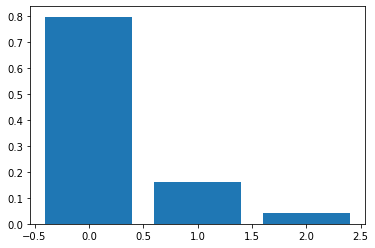

In [ ]:
# random forest for feature importance on a classification problem   ---> SO REMOVE daysprior as it is not important
#The complete example of fitting a RandomForestClassifier and summarizing the calculated feature importance scores is listed below.
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
feature_cols = ['revenue', 'frequency', 'daysprior']
X = dfc[feature_cols] # Features
y = dfc.ClusterNo # Target variable
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

kmeans = KMeans(n_clusters=5, random_state=42, max_iter=50)
kmeans.fit(dfcsecondanalysis)
kmeans.labels_
#assign created labels as ClusterNo
dfcsecondanalysis['ClusterNo'] = kmeans.labels_
dfcsecondanalysis.head(2)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1500)
kmeans.fit(dfc)
kmeans.labels_
#assign created labels as ClusterNo
dfc['ClusterNo'] = kmeans.labels_
dfc['ClusterNo'].unique()
dfc.head(2)

,CustomerID,revenue,frequency,daysprior,ClusterNo
0,12346.0,77183.6,1,325,2
1,12347.0,4310.0,182,1,0


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=50)
kmeans.fit(dfctwo)
kmeans.labels_
#assign created labels as ClusterNo
dfctwo['ClusterNo'] = kmeans.labels_
dfctwo.head(2)

,CustomerID,revenue,frequency,daysprior,ClusterNo
0,12346.0,77183.6,1,325,3
1,12347.0,4310.0,182,1,0


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, max_iter=50)
kmeans.fit(dfcthree)
kmeans.labels_
#assign created labels as ClusterNo
dfcthree['ClusterNo'] = kmeans.labels_
dfcthree.ClusterNo.()

count    4338.000000
mean        0.145920
std         0.640396
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: ClusterNo, dtype: float64

In [ ]:

dfcthree[["ClusterNo", "revenue"]].groupby("ClusterNo").sum()

,revenue
ClusterNo,
0,4397376.544
1,539863.320
2,1179357.790
3,2021912.170
4,748699.070


Text(0.5, 0, 'Cluster')

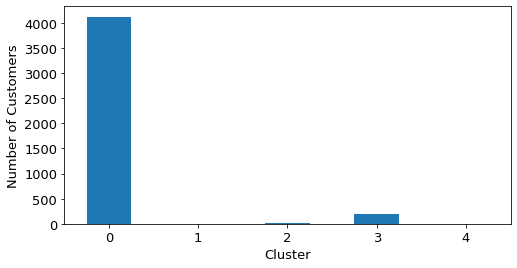

In [ ]:
dfcthreegb = dfcthree.groupby(["ClusterNo"]).size()
dfcthreegb
ax = dfcthreegb.plot.bar(x='ClusterNo', rot=0, figsize=(8, 4), fontsize=13)
ax.set_ylabel('Number of Customers', fontsize=13)
ax.set_xlabel('Cluster', fontsize=13)

In [ ]:
dfcthree[["ClusterNo", "revenue"]].groupby("ClusterNo").describe()

revenue                                                      \
            count           mean           std        min         25%   
ClusterNo                                                               
0          4120.0    1067.324404   1142.812959       3.75     296.170   
1             2.0  269931.660000  14530.139257  259657.30  264794.480   
2            22.0   53607.172273  16261.349712   33053.19   40067.335   
3           189.0   10697.947989   5540.410654    5781.73    6868.290   
4             5.0  149739.814000  31841.192074  117210.08  124914.530   

                                              
                 50%          75%        max  
ClusterNo                                     
0             623.34    1416.2200    5756.89  
1          269931.66  275068.8400  280206.02  
2           53030.72   63937.9025   91062.38  
3            8625.80   12393.7000   31906.82  
4          143711.17  168472.5000  194390.79

In [ ]:
dfcthree[["ClusterNo", "frequency"]].groupby("ClusterNo").describe()

frequency                                                            \
              count         mean          std    min     25%     50%      75%   
ClusterNo                                                                       
0            4120.0    69.987136    94.176865    1.0   16.00    38.0    87.25   
1               2.0  1253.500000  1163.190655  431.0  842.25  1253.5  1664.75   
2              22.0  1244.409091  2002.820788    1.0  132.25   359.0  1468.50   
3             189.0   351.021164   314.369514    4.0  159.00   304.0   441.00   
4               5.0  1623.600000  2320.411666    3.0  336.00   714.0  1395.00   

                   
              max  
ClusterNo          
0          1263.0  
1          2076.0  
2          7676.0  
3          2677.0  
4          5670.0

In [ ]:
dfcthree[["ClusterNo", "daysprior"]].groupby("ClusterNo").describe()

daysprior                                                        
              count       mean         std  min    25%   50%     75%    max
ClusterNo                                                                  
0            4120.0  95.277184  100.811716  0.0  18.00  53.0  150.00  373.0
1               2.0   0.500000    0.707107  0.0   0.25   0.5    0.75    1.0
2              22.0  39.409091   87.677797  0.0   2.00   3.0   14.50  325.0
3             189.0  19.238095   32.788514  0.0   2.00   9.0   22.00  275.0
4               5.0   7.800000    9.418068  0.0   0.00   7.0    9.00   23.0

In [ ]:
dfcthree.describe()

,revenue,frequency,daysprior,ClusterNo
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,2048.688081,90.523744,91.536422,0.145920
std,8985.230220,225.506968,100.014169,0.640396
min,3.750000,1.000000,0.000000,0.000000
25%,306.482500,17.000000,17.000000,0.000000
50%,668.570000,41.000000,50.000000,0.000000
75%,1660.597500,98.000000,141.000000,0.000000
max,280206.020000,7676.000000,373.000000,4.000000


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42, max_iter=50)
kmeans.fit(dfcfour)
kmeans.labels_
#assign created labels as ClusterNo
dfcfour['ClusterNo'] = kmeans.labels_
dfcfour.head()

,CustomerID,revenue,frequency,daysprior,ClusterNo
0,12346.0,77183.60,1,325,3
1,12347.0,4310.00,182,1,4
2,12348.0,1797.24,31,74,4
3,12349.0,1757.55,73,18,4
4,12350.0,334.40,17,309,4


In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42, max_iter=50)
kmeans.fit(dfcfive)
kmeans.labels_
#assign created labels as ClusterNo
dfcfive['ClusterNo'] = kmeans.labels_
dfcfive.head()

,CustomerID,revenue,frequency,daysprior,ClusterNo
0,12346.0,77183.60,1,325,4
1,12347.0,4310.00,182,1,6
2,12348.0,1797.24,31,74,6
3,12349.0,1757.55,73,18,6
4,12350.0,334.40,17,309,6


In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42, max_iter=50)
kmeans.fit(dfcsix)
kmeans.labels_
#assign created labels as ClusterNo
dfcsix['ClusterNo'] = kmeans.labels_
dfcsix.head(2)

,CustomerID,revenue,frequency,daysprior,ClusterNo
0,12346.0,77183.6,1,325,3
1,12347.0,4310.0,182,1,0


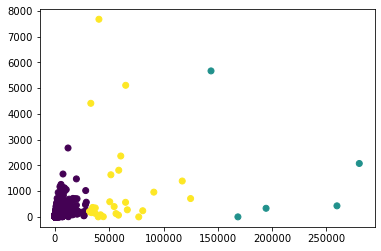

In [ ]:
X = dfc[['revenue', 'frequency']].to_numpy()      
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)    #revenues

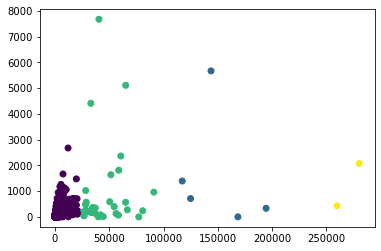

In [ ]:
X = dfctwo[['revenue', 'frequency']].to_numpy()      
y_pred2 = KMeans(n_clusters=4, random_state=42).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)    #revenues

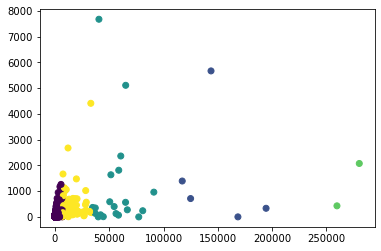

In [ ]:
X = dfcthree[['revenue', 'frequency']].to_numpy()      
y_pred3 = KMeans(n_clusters=5, random_state=42).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred3)    #revenues

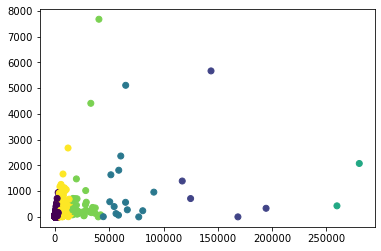

In [ ]:
X = dfcfour[['revenue', 'frequency']].to_numpy()      
y_pred4 = KMeans(n_clusters=6, random_state=42).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred4)    #revenues

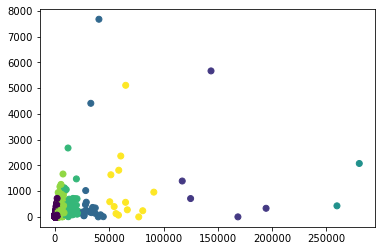

In [ ]:
X = dfcfive[['revenue', 'frequency']].to_numpy()      
y_pred5 = KMeans(n_clusters=7, random_state=42).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred5)    #revenues

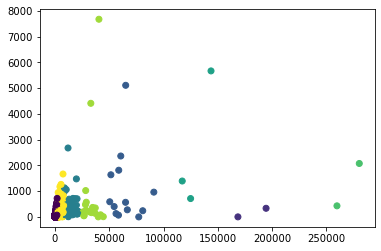

In [ ]:
X = dfcsix[['revenue', 'frequency']].to_numpy()      
y_pred6 = KMeans(n_clusters=8, random_state=42).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred6)    #revenues

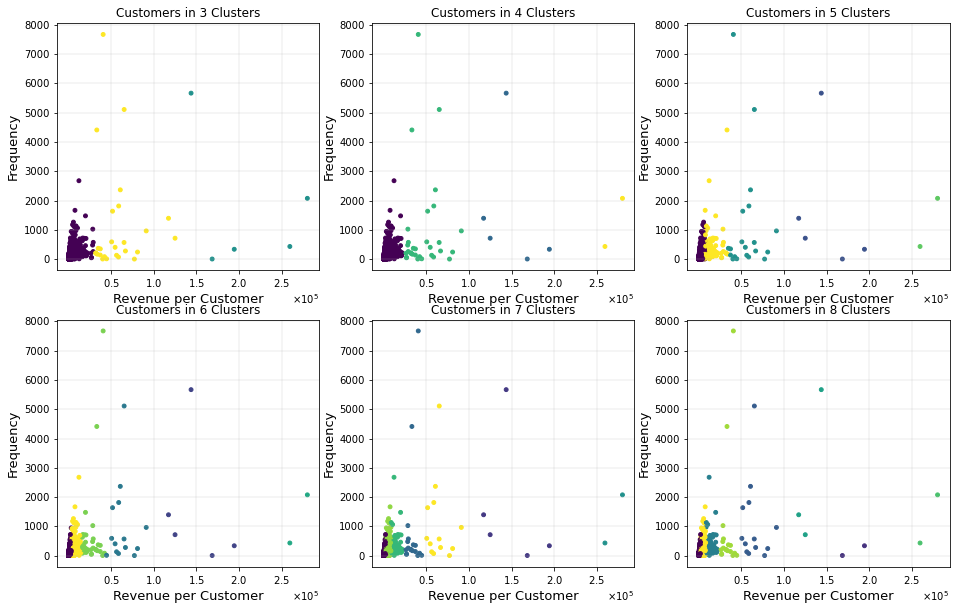

In [ ]:
fig, ((ax1, ax2, ax3), (axs4, axs5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,  figsize=(16, 10))

ax1 = plt.subplot2grid((2,3),(0, 0))
ax1.scatter(dfc['revenue'], dfc['frequency'], c=y_pred, s=15)
ax1.set_title('Customers in 3 Clusters')
ax1.set_xlabel('Revenue per Customer', fontsize=13)
ax1.set_ylabel('Frequency', fontsize=13)
ax1.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax1.xaxis.set_major_formatter(formatter) 
ax1.grid(linewidth=0.25)


ax2 = plt.subplot2grid((2,3),(0, 1))
ax2.scatter(dfctwo['revenue'], dfctwo['frequency'], c=y_pred2, s=15)
ax2.set_title('Customers in 4 Clusters')
ax2.set_xlabel('Revenue per Customer', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13)
ax2.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.xaxis.set_major_formatter(formatter) 
ax2.grid(linewidth=0.25)

ax3 = plt.subplot2grid((2,3),(0, 2))
ax3.scatter(dfcthree['revenue'], dfcthree['frequency'], c=y_pred3, s=15)
ax3.set_title('Customers in 5 Clusters')
ax3.set_xlabel('Revenue per Customer', fontsize=13)
ax3.set_ylabel('Frequency', fontsize=13)
ax3.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax3.xaxis.set_major_formatter(formatter) 
ax3.grid(linewidth=0.25)

ax4 = plt.subplot2grid((2,3),(1, 0))
ax4.scatter(dfcfour['revenue'], dfcfour['frequency'], c=y_pred4, s=15)
ax4.set_title('Customers in 6 Clusters')
ax4.set_xlabel('Revenue per Customer', fontsize=13)
ax4.set_ylabel('Frequency', fontsize=13)
ax4.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax4.xaxis.set_major_formatter(formatter) 
ax4.grid(linewidth=0.25)

ax5 = plt.subplot2grid((2,3),(1, 1))
ax5.scatter(dfcfive['revenue'], dfcfive['frequency'], c=y_pred5, s=15)
ax5.set_title('Customers in 7 Clusters')
ax5.set_xlabel('Revenue per Customer', fontsize=13)
ax5.set_ylabel('Frequency', fontsize=13)
ax5.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax5.xaxis.set_major_formatter(formatter) 
ax5.grid(linewidth=0.25)

ax6 = plt.subplot2grid((2,3),(1, 2))
ax6.scatter(dfcsix['revenue'], dfcsix['frequency'], c=y_pred6, s=15)
ax6.set_title('Customers in 8 Clusters')
ax6.set_xlabel('Revenue per Customer', fontsize=13)
ax6.set_ylabel('Frequency', fontsize=13)
ax6.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax6.xaxis.set_major_formatter(formatter) 
ax6.grid(linewidth=0.25)

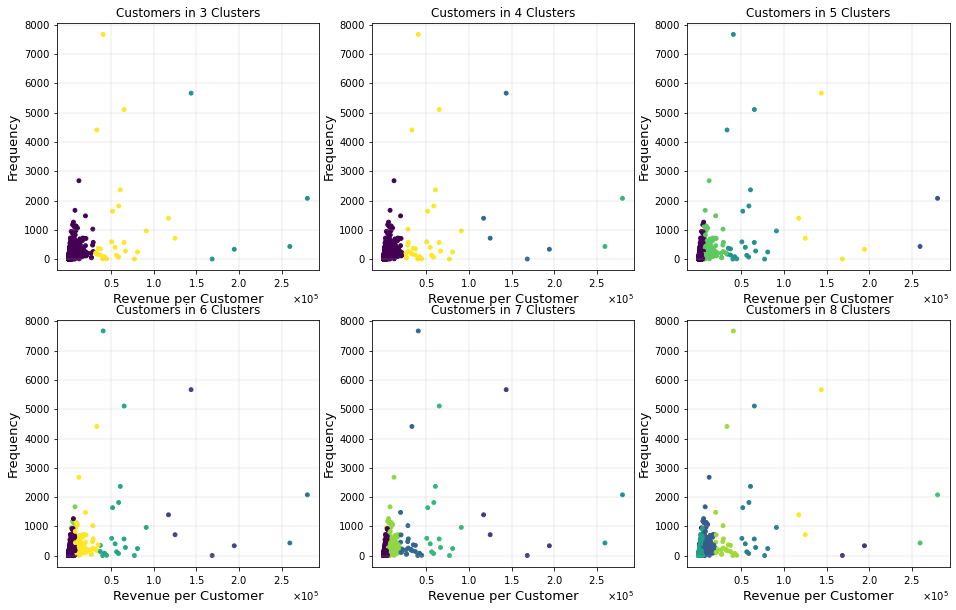

In [ ]:
# DOUBLE CHECKING IF ABOVE PLOTS ARE CONSISTENT WHEN CLUSTERNO IS USED INSTEAD OF Y_PRED-- GOOD THAT IT PRODUCES SAME PLOTS

fig, ((ax1, ax2, ax3), (axs4, axs5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,  figsize=(16, 10))

ax1 = plt.subplot2grid((2,3),(0, 0))
ax1.scatter(dfc['revenue'], dfc['frequency'],  c=dfc.ClusterNo, s=15)
ax1.set_title('Customers in 3 Clusters')
ax1.set_xlabel('Revenue per Customer', fontsize=13)
ax1.set_ylabel('Frequency', fontsize=13)
ax1.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax1.xaxis.set_major_formatter(formatter) 
ax1.grid(linewidth=0.25)


ax2 = plt.subplot2grid((2,3),(0, 1))
ax2.scatter(dfctwo['revenue'], dfctwo['frequency'], c=dfctwo.ClusterNo, s=15)
ax2.set_title('Customers in 4 Clusters')
ax2.set_xlabel('Revenue per Customer', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13)
ax2.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax2.xaxis.set_major_formatter(formatter) 
ax2.grid(linewidth=0.25)

ax3 = plt.subplot2grid((2,3),(0, 2))
ax3.scatter(dfcthree['revenue'], dfcthree['frequency'], c=dfcthree.ClusterNo, s=15)
ax3.set_title('Customers in 5 Clusters')
ax3.set_xlabel('Revenue per Customer', fontsize=13)
ax3.set_ylabel('Frequency', fontsize=13)
ax3.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax3.xaxis.set_major_formatter(formatter) 
ax3.grid(linewidth=0.25)

ax4 = plt.subplot2grid((2,3),(1, 0))
ax4.scatter(dfcfour['revenue'], dfcfour['frequency'], c=dfcfour.ClusterNo, s=15)
ax4.set_title('Customers in 6 Clusters')
ax4.set_xlabel('Revenue per Customer', fontsize=13)
ax4.set_ylabel('Frequency', fontsize=13)
ax4.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax4.xaxis.set_major_formatter(formatter) 
ax4.grid(linewidth=0.25)

ax5 = plt.subplot2grid((2,3),(1, 1))
ax5.scatter(dfcfive['revenue'], dfcfive['frequency'], c=dfcfive.ClusterNo, s=15)
ax5.set_title('Customers in 7 Clusters')
ax5.set_xlabel('Revenue per Customer', fontsize=13)
ax5.set_ylabel('Frequency', fontsize=13)
ax5.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax5.xaxis.set_major_formatter(formatter)
ax5.grid(linewidth=0.25)

ax6 = plt.subplot2grid((2,3),(1, 2))
ax6.scatter(dfcsix['revenue'], dfcsix['frequency'], c=dfcsix.ClusterNo, s=15)
ax6.set_title('Customers in 8 Clusters')
ax6.set_xlabel('Revenue per Customer', fontsize=13)
ax6.set_ylabel('Frequency', fontsize=13)
ax6.set_xticks([50000, 100000, 150000, 200000, 250000])
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax6.xaxis.set_major_formatter(formatter) 
ax6.grid(linewidth=0.25)

In [ ]:
dfc.head()

,CustomerID,revenue,frequency,daysprior,ClusterNo
0,12346.0,77183.60,1,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0


ClusterNo
0    4120
1       2
2      22
3     189
4       5
dtype: int64

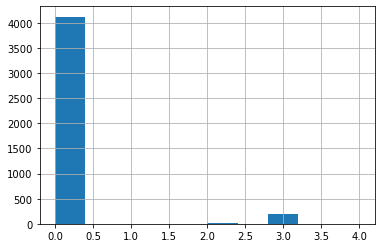

In [ ]:
dfcthree.ClusterNo.hist()
dfcthreeGB = dfcthree.groupby(["ClusterNo"]).size()
dfcthreeGB

In [ ]:
X[:, 0]  #revenue per customer

array([77183.6 ,  4310.  ,  1797.24, ...,   178.05,  2045.53,  1837.28])

In [ ]:
X[:, 1]  #freq per customer

array([  1., 182.,  31., ...,  12., 721.,  70.])

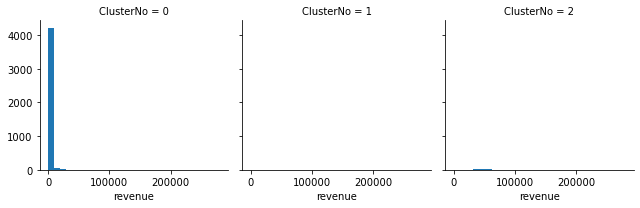

In [ ]:
g = sns.FacetGrid(dfc, col='ClusterNo')
g.map(plt.hist, 'revenue', bins=3)

<AxesSubplot:xlabel='ClusterNo', ylabel='revenue'>

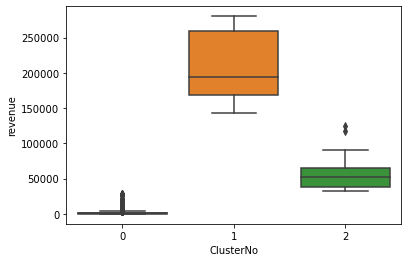

In [ ]:
sns.boxplot(x='ClusterNo', y='revenue', data=dfc)

<AxesSubplot:xlabel='ClusterNo', ylabel='revenue'>

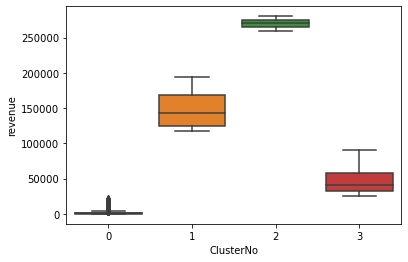

In [ ]:
sns.boxplot(x='ClusterNo', y='revenue', data=dfctwo)

<AxesSubplot:xlabel='ClusterNo', ylabel='revenue'>

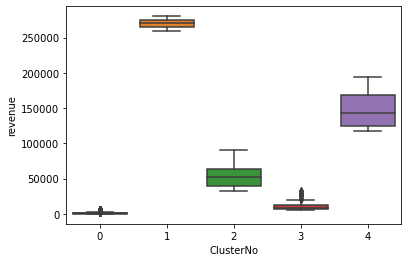

In [ ]:
sns.boxplot(x='ClusterNo', y='revenue', data=dfcthree)

sns.boxplot(x='ClusterNo', y='revenue', data=dfcthree)

<AxesSubplot:xlabel='ClusterNo', ylabel='frequency'>

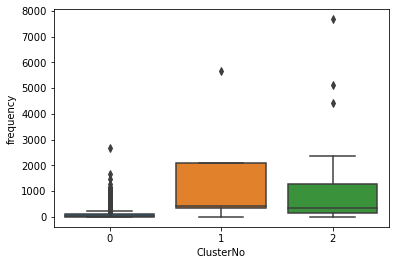

In [ ]:
sns.boxplot(x='ClusterNo', y='frequency', data=dfc)

<AxesSubplot:xlabel='ClusterNo', ylabel='frequency'>

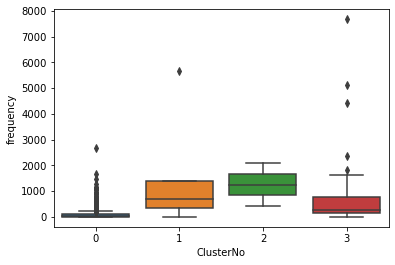

In [ ]:
sns.boxplot(x='ClusterNo', y='frequency', data=dfctwo)

In [ ]:
corr=dfc[['revenue', 'frequency', 'daysprior', 'CustomerID']].corr()
corr

,revenue,frequency,daysprior
revenue,1.000000,0.425282,-0.121831
frequency,0.425282,1.000000,-0.206444
daysprior,-0.121831,-0.206444,1.000000


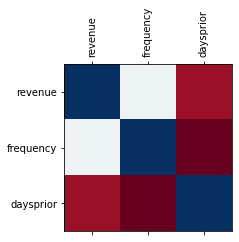

In [ ]:
fig=plt.figure(figsize=(3,3))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

sns.swarmplot(x='ClusterNo',y='revenue',data=dfc)
plt.xlabel('ClusterNo')
plt.ylabel('revenue')
plt.show()

sns.swarmplot(x='ClusterNo',y='revenue',data=dfctwo)
plt.xlabel('ClusterNo')
plt.ylabel('revenue')
plt.show()

C:\Users\banut\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 99.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\banut\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


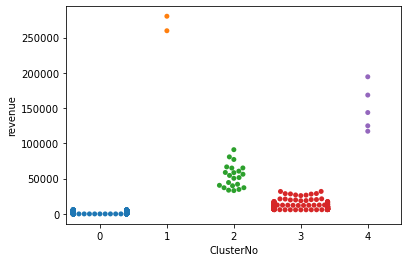

In [ ]:
sns.swarmplot(x='ClusterNo',y='revenue',data=dfcthree)
plt.xlabel('ClusterNo')
plt.ylabel('revenue')
plt.show()

sns.swarmplot(x='ClusterNo',y='revenue',data=dfctfour)
plt.xlabel('ClusterNo')
plt.ylabel('revenue')
plt.show()

sns.swarmplot(x='ClusterNo',y='revenue',data=dfctfive)
plt.xlabel('ClusterNo')
plt.ylabel('revenue')
plt.show()

sns.swarmplot(x='ClusterNo',y='revenue',data=dfcsix)
plt.xlabel('ClusterNo')
plt.ylabel('revenue')
plt.show()

SECOND ANALYSIS -NON-ML TO VALIDATE ML RESULTS???

In [ ]:
dfcsecondanalysis.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


X = dfcsecondanalysis[['revenue', 'frequency', 'daysprior']].to_numpy()      
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)  
dfcsecondanalysis.head()

kmeans = KMeans(n_clusters=5, random_state=42, max_iter=50)
kmeans.fit(dfcsecondanalysis)
kmeans.labels_
#assign created labels as ClusterNo
dfcsecondanalysis['ClusterNo'] = kmeans.labels_
dfcsecondanalysis.head(2)

In [ ]:
recency1 = (datetime(2010, 12, 1) - df.groupby("CustomerID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

In [ ]:
freq1 = df.groupby("CustomerID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

Can we draw Empirical cumulative distribution functions (ECDFs)for 3 customer clusters in the same chart?
    


In [ ]:
dfcsecondanalysis.head()

,CustomerID,revenue,frequency,daysprior
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
dfcsecondanalysis["Recencycategory"] = pd.qcut(dfcsecondanalysis["daysprior"], 5, labels = [5, 4 , 3, 2, 1])
dfcsecondanalysis["Frequencycategory"]= pd.qcut(dfcsecondanalysis["frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
dfcsecondanalysis["Revenuecategory"] = pd.qcut(dfcsecondanalysis['revenue'], 5, labels = [1, 2, 3, 4, 5])
dfcsecondanalysis.head()

,CustomerID,revenue,frequency,daysprior,Recencycategory,Frequencycategory,Revenuecategory
0,12346.0,77183.60,1,325,1,1,5
1,12347.0,4310.00,182,1,5,5,5
2,12348.0,1797.24,31,74,2,3,4
3,12349.0,1757.55,73,18,4,4,4
4,12350.0,334.40,17,309,1,2,2


In [ ]:
dfcsecondanalysis["RFR_SCORE"] = (dfcsecondanalysis["Recencycategory"].astype(str) + 
                     dfcsecondanalysis["Frequencycategory"].astype(str) + 
                     dfcsecondanalysis["Revenuecategory"].astype(str))
dfcsecondanalysis.head()

,CustomerID,revenue,frequency,daysprior,Recencycategory,Frequencycategory,Revenuecategory,RFR_SCORE
0,12346.0,77183.60,1,325,1,1,5,115
1,12347.0,4310.00,182,1,5,5,5,555
2,12348.0,1797.24,31,74,2,3,4,234
3,12349.0,1757.55,73,18,4,4,4,444
4,12350.0,334.40,17,309,1,2,2,122


In [ ]:
seg_map = {
    r'[1-3][1-3][1-2]': 'Lowest Value-IGNORE',
    r'[3-5][1-3][1-2]': 'Lowest Value-IGNORE',
    
    r'[1-3][1-5][2-5]': 'STIMULATE',
    r'[1-3][3-5][1-2]': 'STIMULATE',
    r'[3-5][1-3][2-5]': 'New customers-WELCOME',
    
    r'[3-5][3-5][1-2]': 'Loyal Silver-REWARD',
    r'[3-5][3-5][2-5]': 'Highest Value-REWARD'
 
}

dfcsecondanalysis['Segment'] = dfcsecondanalysis['Recencycategory'].astype(str) + dfcsecondanalysis['Frequencycategory'].astype(str)+ dfcsecondanalysis['Revenuecategory'].astype(str)
dfcsecondanalysis['Segment'] = dfcsecondanalysis['Segment'].replace(seg_map, regex=True)

In [ ]:
dfcsecondanalysis.head(10)

,CustomerID,revenue,frequency,daysprior,Recencycategory,Frequencycategory,Revenuecategory,RFR_SCORE,Segment
0,12346.0,77183.60,1,325,1,1,5,115,STIMULATE
1,12347.0,4310.00,182,1,5,5,5,555,Highest Value-REWARD
2,12348.0,1797.24,31,74,2,3,4,234,STIMULATE
3,12349.0,1757.55,73,18,4,4,4,444,Highest Value-REWARD
4,12350.0,334.40,17,309,1,2,2,122,Lowest Value-IGNORE
5,12352.0,2506.04,85,35,3,4,5,345,STIMULATE
6,12353.0,89.00,4,203,1,1,1,111,Lowest Value-IGNORE
7,12354.0,1079.40,58,231,1,4,4,144,STIMULATE
8,12355.0,459.40,13,213,1,1,2,112,Lowest Value-IGNORE
9,12356.0,2811.43,59,22,4,4,5,445,Highest Value-REWARD


In [ ]:
dfsa = dfcsecondanalysis.groupby(["Segment"]).size()
dfsa

Segment
Highest Value-REWARD     1050
Lowest Value-IGNORE      1606
Loyal Silver-REWARD        50
New customers-WELCOME     332
STIMULATE                1300
dtype: int64

Text(0.5, 0, 'Cluster')

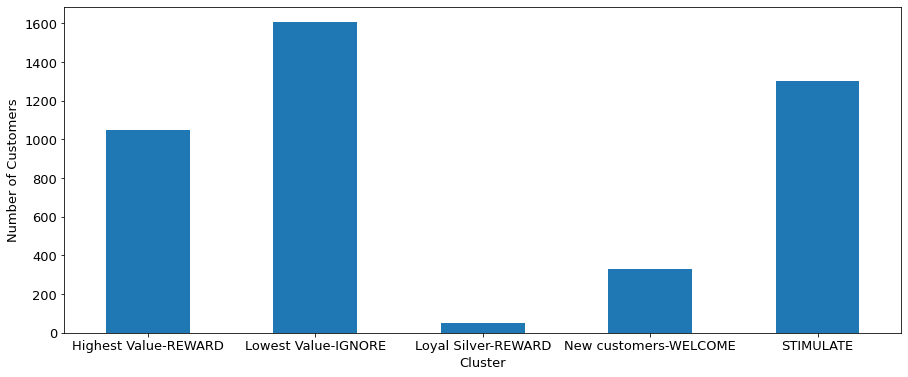

In [ ]:
ax = dfsa.plot.bar(x='Segment', rot=0, figsize=(15, 6), fontsize=13)
ax.set_ylabel('Number of Customers', fontsize=13)
ax.set_xlabel('Cluster', fontsize=13)